# **Data Preprocessing Techniques**
* Data cleaning
    * Data Imputation
    * Feature Scaling
* Feature transformations
    * Polynomial Features
    * Discretization
    * Handling categorical variables
    * Custom Transformers
    * Composite Transformers
        * Apply composite feature to diverse features
        * TargetTransformRegressor
    * Feature Selection
        * Filter based methods
        * Wrapper based Methods
    * Feature extraction
        * PCA

These transformations are applied in a specific order and the order can be specified via Pipeline. d via Pipeline.


In [1]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
data = [{'age': 4, 'height':96.0},
{'age': 1, 'height':73.9},
{'age': 3, 'height':88.9},
{'age': 2, 'height':81.6}]

data

[{'age': 4, 'height': 96.0},
 {'age': 1, 'height': 73.9},
 {'age': 3, 'height': 88.9},
 {'age': 2, 'height': 81.6}]

In [3]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
print(dv.fit_transform(data)) #creates a 2-d matrix

[[ 4.  96. ]
 [ 1.  73.9]
 [ 3.  88.9]
 [ 2.  81.6]]


In [4]:
np.array(data) #create numpy array

array([{'age': 4, 'height': 96.0}, {'age': 1, 'height': 73.9},
       {'age': 3, 'height': 88.9}, {'age': 2, 'height': 81.6}],
      dtype=object)

In [5]:
pd.DataFrame(data) #create dataframe

,age,height
0,4,96.0
1,1,73.9
2,3,88.9
3,2,81.6


In [6]:
from sklearn.feature_extraction import FeatureHasher

# Define the data
data = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]

# Create a FeatureHasher object
h = FeatureHasher(n_features=5)

# Transform the data
f = h.transform(data)

# Print the transformed data
print(f.toarray())

[[ 0.  0. -4. -1.  2.]
 [ 0.  0.  0. -2. -5.]]


# Data cleaning

## SimpleImputer

In [7]:
X = np.array([[7, 1], [None, 8], [2, None], [9, 6]])
X

array([[7, 1],
       [None, 8],
       [2, None],
       [9, 6]], dtype=object)

In [8]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean', add_indicator=False)
si.fit_transform(X)

array([[7., 1.],
       [6., 8.],
       [2., 5.],
       [9., 6.]])

In [9]:
from sklearn.impute import SimpleImputer

#add_indicator flag adds one column per missing value, and indicates the missing value in the corresponding row by a 1.
si = SimpleImputer(strategy='mean', add_indicator=True)
si.fit_transform(X)

array([[7., 1., 0., 0.],
       [6., 8., 1., 0.],
       [2., 5., 0., 1.],
       [9., 6., 0., 0.]])

In [10]:
cols = ["age","sex","cp","trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
heart_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", encoding='utf-8', header=None, names=cols)

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [12]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [13]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [14]:
heart_data["ca"].unique() # ? indicates that there're some missing values

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [15]:
heart_data['thal'].unique() # ? indicates that there're some missing values


array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [16]:
heart_data.replace("?", np.nan, inplace=True) # replace all ? by np.nan

In [17]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
heart_data_imputed = si.fit_transform(heart_data)

In [18]:
# KNNImputer

In [19]:
X = np.array([[1, 2, None], [3, 4, 3], [None, 6, 5], [8, 8, 7]])
X

array([[1, 2, None],
       [3, 4, 3],
       [None, 6, 5],
       [8, 8, 7]], dtype=object)

In [20]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=2, weights='uniform')# all the neighbors have equal influence
knn.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [21]:
# the neighbors are weighted by the inverse of their distance, 
#meaning that closer neighbors have more influence than farther ones
knn = KNNImputer(n_neighbors=2, weights='distance') # 
knn.fit_transform(X)

array([[1.        , 2.        , 3.66666667],
       [3.        , 4.        , 3.        ],
       [5.5       , 6.        , 5.        ],
       [8.        , 8.        , 7.        ]])

In [22]:
X = np.array([[np.nan, 2, 4, np.nan],
              [5, np.nan, 7, np.nan],
              [np.nan, np.nan, np.nan, np.nan]])
X

array([[nan,  2.,  4., nan],
       [ 5., nan,  7., nan],
       [nan, nan, nan, nan]])

In [23]:
imputer = KNNImputer()
imputer.fit_transform(X)

array([[5. , 2. , 4. ],
       [5. , 2. , 7. ],
       [5. , 2. , 5.5]])

In [24]:
imputer = KNNImputer(keep_empty_features=True)
imputer.fit_transform(X)

array([[5. , 2. , 4. , 0. ],
       [5. , 2. , 7. , 0. ],
       [5. , 2. , 5.5, 0. ]])

In [25]:
X = np.array([[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]])
X

array([[ 1.,  2., nan],
       [ 3.,  4.,  3.],
       [nan,  6.,  5.],
       [ 8.,  8.,  7.]])

In [26]:
from sklearn.impute import MissingIndicator

indicator = MissingIndicator()
indicator.fit_transform(X)

array([[False,  True],
       [False, False],
       [ True, False],
       [False, False]])

In [27]:
indicator = MissingIndicator(features='all')
indicator.fit_transform(X)

array([[False, False,  True],
       [False, False, False],
       [ True, False, False],
       [False, False, False]])

In [28]:
cols = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None, encoding='utf-8', names=cols)
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [29]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [30]:
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [31]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [32]:
abalone_data = abalone_data.replace({'Sex': {'M': 1, 'F': 2, 'I': 3}})

In [33]:
abalone_data=abalone_data.drop('Rings',axis=1)

In [34]:
abalone_data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


##### Seperate Histograms

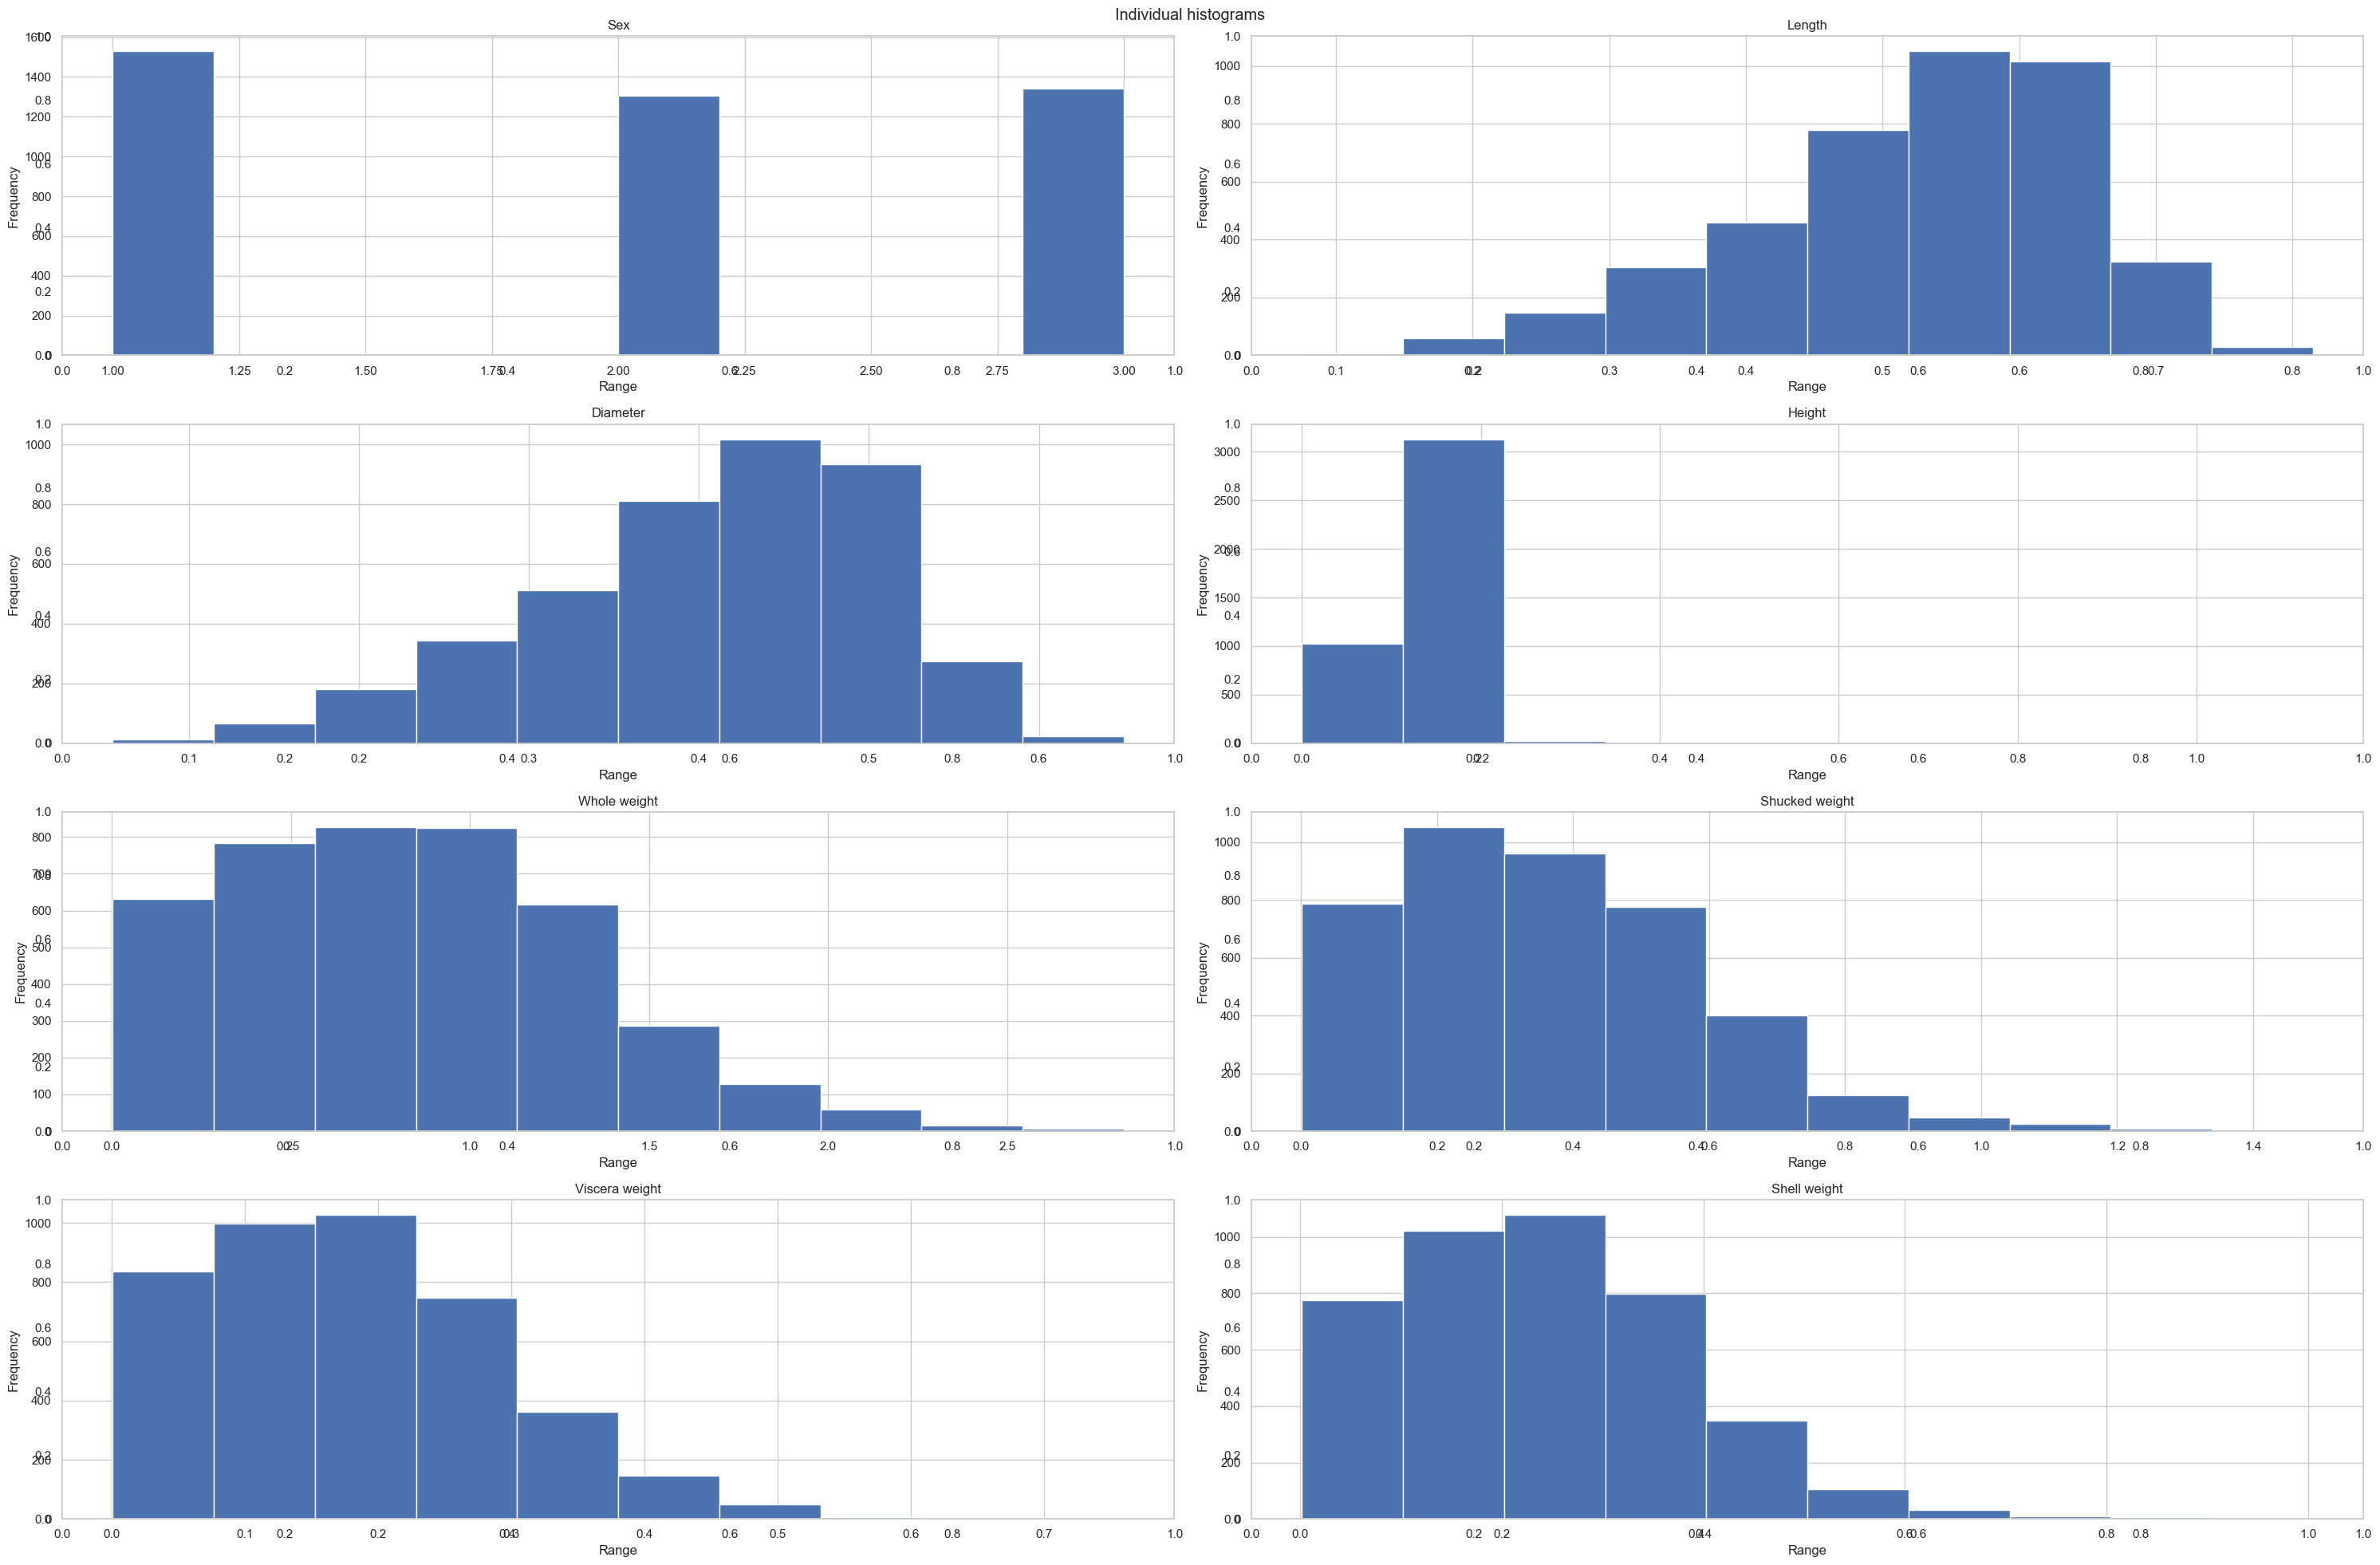

In [35]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.suptitle("Individual histograms")
fig.set_size_inches(30, 20)

for i in range(len(abalone_data.columns)):
    fig.add_subplot(4,2,i+1)
    fig.tight_layout()
    plt.hist(abalone_data[abalone_data.columns[i]])
    plt.title(abalone_data.columns[i])
    plt.xlabel('Range')
    plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

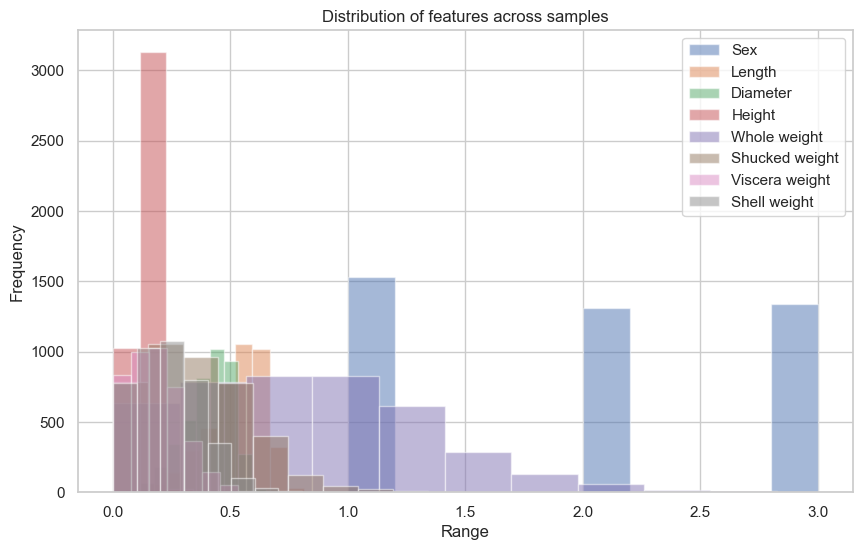

In [36]:
#Histograms collated
fig = plt.figure()
fig.set_size_inches(10, 6)

for feature in abalone_data.columns:
    plt.hist(abalone_data[feature], alpha=0.5, label=feature)

plt.legend()
plt.title('Distribution of features across samples')
plt.xlabel('Range')
plt.ylabel('Frequency')

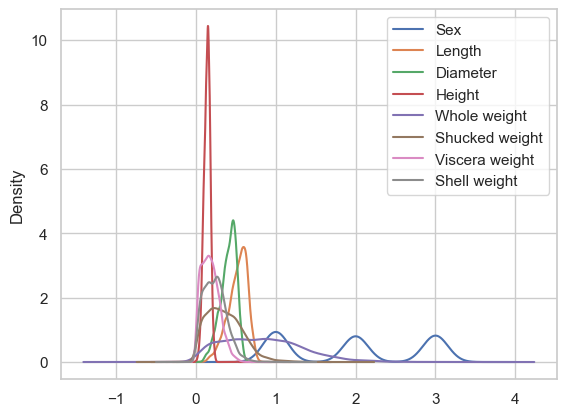

In [37]:
ax = abalone_data.plot.kde()

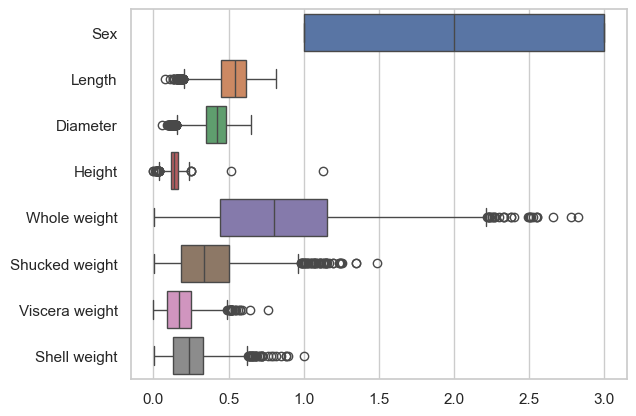

In [38]:
ax = sns.boxplot(data=abalone_data,orient='h')

<Axes: >

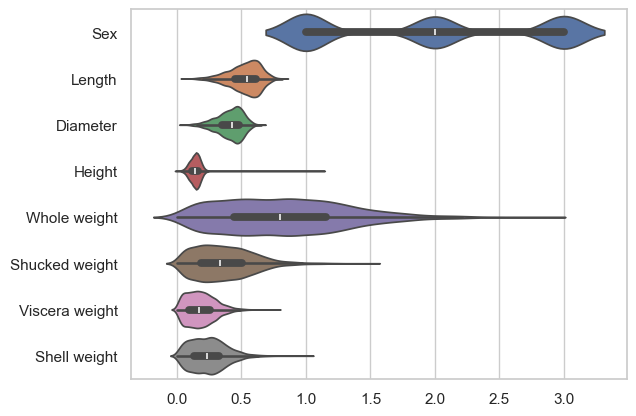

In [39]:
sns.set(style = 'whitegrid')
sns.violinplot(data=abalone_data, orient="h", density_norm='width')

## **STEP 4:** Scaling

* Normalisation
    * `MaxAbsoluteScaler` transaforms features into range [-1,1]
        * x' = x/MaxAbsoluteValue 
        * MaxAbsoluteValue = max(x.max, |x.min|)
              
    * `MinMaxScaler` transforms feature in range [0,1]
        * x_new = (x_old - x_min)/(x_max - x_min)
        * Where,
            * $X_{old}$ is the old value of a data point, which is rescaled to $ X_{new}$.
            * $X_{min}$ is minimum value of feature $X$
            * $X_{max}$, is maximum value of feature $X$.

* Standardisation
    * `StandardScaler`
    * X_new = (X_old - mu)/sigma

In [40]:
x = np.array([4, 2, 5, -2, -100]).reshape(-1, 1)
x

array([[   4],
       [   2],
       [   5],
       [  -2],
       [-100]])

In [41]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
mas.fit_transform(x)

array([[ 0.04],
       [ 0.02],
       [ 0.05],
       [-0.02],
       [-1.  ]])

In [42]:
from sklearn.preprocessing import MinMaxScaler

X = abalone_data
mm = MinMaxScaler()
X_normalised = mm.fit_transform(X)
X_normalised[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

In [43]:
X_normalised.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [44]:
X_normalised.mean(axis=1)

array([0.21631706, 0.1351334 , 0.331511  , ..., 0.38107356, 0.43481135,
       0.522802  ])

Text(0, 0.5, 'Frequency')

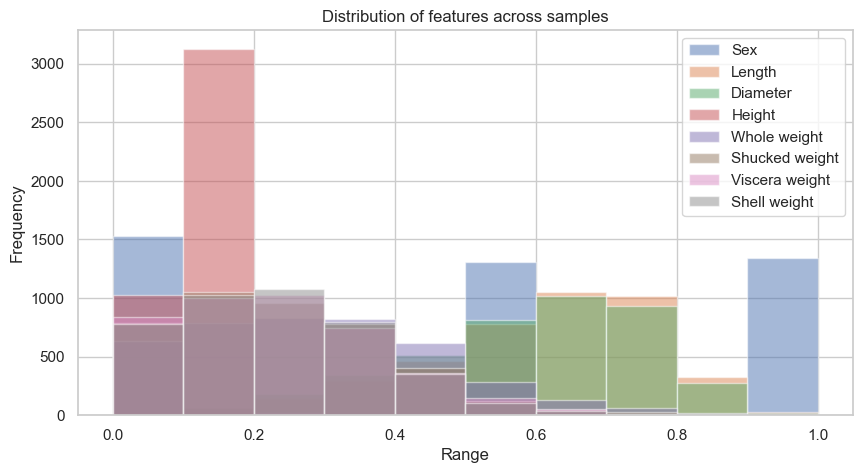

In [45]:
fig = plt.figure()
fig.set_size_inches(10,5)
cols = abalone_data.columns
df = pd.DataFrame(X_normalised, columns=cols)

for feature in df.columns:
    plt.hist(df[feature], alpha=0.5, label=feature)

plt.legend()
plt.title('Distribution of features across samples')
plt.xlabel('Range')
plt.ylabel('Frequency')

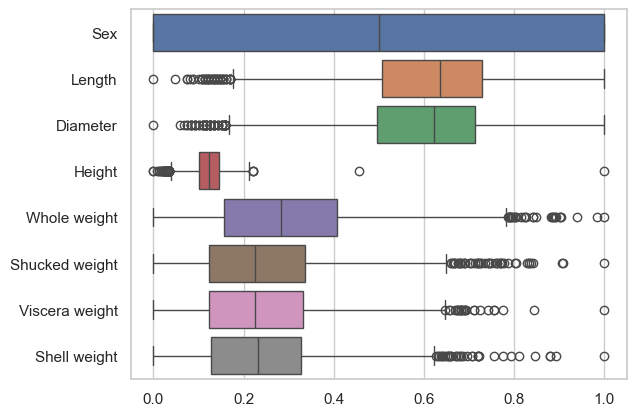

In [46]:
ax = sns.boxplot(data=df,orient='h')

<Axes: >

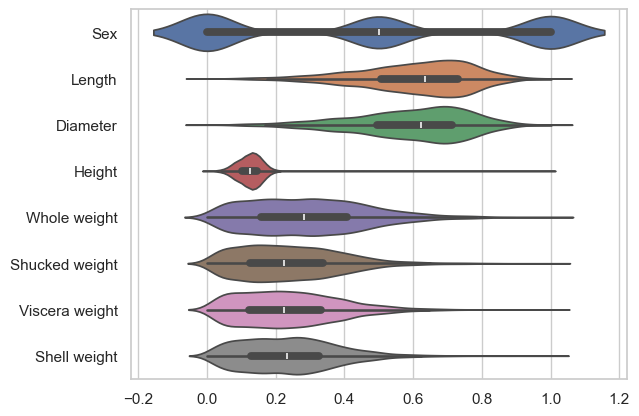

In [47]:
sns.set(style = 'whitegrid')
sns.violinplot(data= df, orient="h", density_norm="width")

##### KDE Plot of transformed features

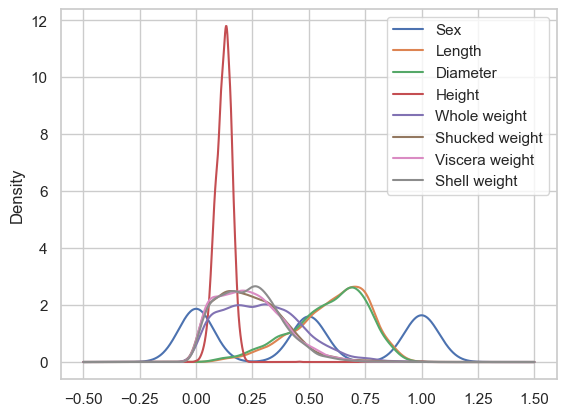

In [48]:
ax = df.plot.kde()

### Standardisation

Standardization is another feature scaling technique that results into (close to ) zero mean and unit standard deviation of a feature's values.
Formula for standardization:
\begin{equation} X_{new} = \frac{X_{old}-\mu}{\sigma}\end{equation}

Here $\mu$  and $\sigma$ respectively are the mean and standard deviation of the feature values.

Standardization can be achieved by StandardScaler from sklearn library.



In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_standardised = ss.fit_transform(X)
X_standardised.mean(axis=0), X_standardised.std(axis=0)

(array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
         9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

Text(0, 0.5, 'Frequency')

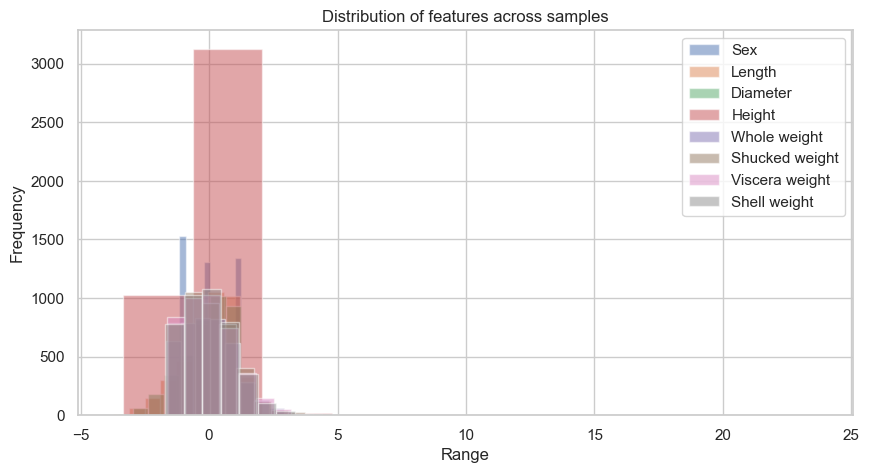

In [50]:
fig = plt.figure()
fig.set_size_inches(10, 5)
cols = abalone_data.columns
df = pd.DataFrame(X_standardised, columns=cols)

for feature in df.columns:
    plt.hist(df[feature], alpha=0.5, label=feature)

plt.legend()
plt.title('Distribution of features across samples')
plt.xlabel('Range')
plt.ylabel('Frequency')

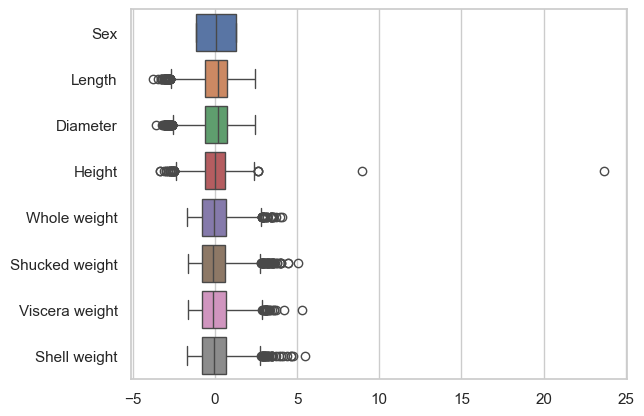

In [51]:
ax = sns.boxplot(data=df,orient='h')

<Axes: >

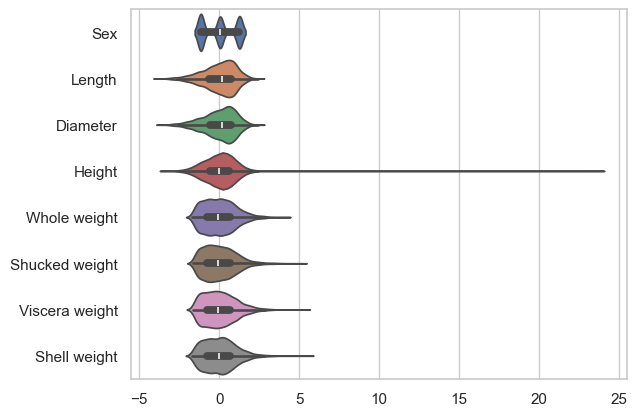

In [52]:
sns.set(style = 'whitegrid')
sns.violinplot(data= df, orient="h", density_norm="width")

##### KDE Plot of standardised features

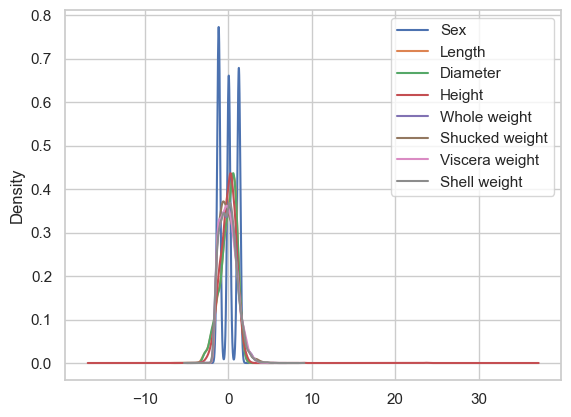

In [53]:
ax = df.plot.kde()

# **5.Custom transformers**

Enables conversion of an existing Python function into a transformer to assist in data cleaning or processing.

Useful when:
1. The dataset consists of *hetereogeneous data types* (e.g. raster images and text captions),
2. The dataset is stored in a `pandas.DataFrame` and different columns reuqire *different processing pipelines.*
3. We need stateless transformations such as taking the log of frequencies, custom scaling, etc.

In [54]:
from sklearn.preprocessing import FunctionTransformer
X = np.array([[128, 2], [2, 256], [4, 1], [512, 64]])

In [55]:
ft = FunctionTransformer(np.log2)
ft.fit_transform(X)

array([[7., 1.],
       [1., 8.],
       [2., 0.],
       [9., 6.]])

In [56]:
ft = FunctionTransformer(np.mean) # mean of all elements
ft.fit_transform(X)

121.125

You can implement a transformer from an arbitrary function with `FunctionTransformer`.
* For example, let us build a tranformer that applies a log transformation to features.
For this demonstration, we will be using a  [wine quality dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) from uci machine learning repository.

It has got the following attributes:

    1. fixed acidity
    2. volatile acidity
    3. citric acid
    4. residual sugar
    5. chlorides
    6. free sulfur dioxide
    7. total sulfur dioxide
    8. density
    9. pH
    10. sulphates
    11. alcohol
    12. quality (output: score between 0 and 10)


In [57]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [58]:
transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_transformed = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed, columns=wine_data.columns).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,2.215842,0.417173,0.228147,1.218131,0.083038,2.639013,3.634750,0.691519,1.460557,0.501073,2.431458,1.885054
std,0.178100,0.114926,0.152423,0.269969,0.038991,0.623790,0.682575,0.000945,0.035760,0.093731,0.090434,0.122749
min,1.722767,0.113329,0.000000,0.641854,0.011929,0.693147,1.945910,0.688170,1.319086,0.285179,2.240710,1.386294
25%,2.091864,0.329304,0.086178,1.064711,0.067659,2.079442,3.135494,0.690945,1.437463,0.438255,2.351375,1.791759
50%,2.186051,0.418710,0.231112,1.163151,0.076035,2.708050,3.663562,0.691521,1.460938,0.482426,2.415914,1.945910
75%,2.322388,0.494696,0.350657,1.280934,0.086178,3.091042,4.143135,0.692064,1.481605,0.548121,2.493205,1.945910
max,2.827314,0.947789,0.693147,2.803360,0.476855,4.290459,5.669881,0.694990,1.611436,1.098612,2.766319,2.197225


Notice the change in statistics of all features

For example, 
    
    total sulfur dioxide 	1599.0 	46.467792 	32.895324 	6.00000 	22.0000 	38.00000 	62.000000 	289.00000

Became

    total sulfur dioxide 	1599.0 	3.634750 	0.682575 	1.945910 	3.135494 	3.663562 	4.143135 	5.669881    

# **6 Polynomial Features** 

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form $[a,b]$, the degree-2 polynomial features are $[1,a,a^2,ab,b^2]$.
`sklearn.preprocessing.PolynomialFeatures` enables us to perform polynomial transformation of desired degree. Let's demonstrate it with *wine quality* dataset.


In [59]:
X = np.array([[2, 3],[4, 5],[6,7]]) 
X

array([[2, 3],
       [4, 5],
       [6, 7]])

In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
poly.fit_transform(X)

array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,  36.,  42.,  49., 216., 252., 294., 343.]])

In [61]:
from sklearn.preprocessing import PolynomialFeatures
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
wine_data_copy = wine_data.copy()
wine_data = wine_data.drop(['quality'],axis=1)
print('Number of features before transformation = ', wine_data.shape)

#Let us fit a polynomial of degree-2 to wine_data
poly = PolynomialFeatures()
poly_wine_data = poly.fit_transform(wine_data)
print('Number of features after transformation=', poly_wine_data.shape)

Number of features before transformation =  (1599, 11)
Number of features after transformation= (1599, 78)


In [62]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

Observe that - 
* Some features have ^2 suffix - these are degree-2 features of input features. For example, `sulphates^2` is the suqare of `sulphates` features.
* Some features are combination of names of the original feature names. For example,`total sulfur dioxide pH` is a combinationn of two features `total sulfur dioxide` and `pH`.

# **7. Discretization**

**Discretization** (otherwise known as **quantization or binning**) provides a way to partition continuous features into discrete values.


* Certain datasets with conntinuous features may benefit from discretization, because discretization can transform the datasets of continuous attributes to one with only nomial attributes.
* One-hot encoded discretized features can make a model more expressive, while maintaining interpretability.
* For instance, pre-processing with discretizer can introduce non-linearity to linear models.

In [63]:
X = np.array([0, 0.125, 0.25, 0.375, 0.5, 0.675, 0.75, 0.875, 1.0]).reshape(9,1)
X

array([[0.   ],
       [0.125],
       [0.25 ],
       [0.375],
       [0.5  ],
       [0.675],
       [0.75 ],
       [0.875],
       [1.   ]])

In [64]:
from sklearn.preprocessing import KBinsDiscretizer

KBD = KBinsDiscretizer(n_bins=5, subsample=None, strategy='uniform', encode='onehot')
X_fit = KBD.fit_transform(X)
X_fit.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [65]:
KBD = KBinsDiscretizer(n_bins=5, subsample=None, strategy='kmeans', encode='onehot')
X_fit = KBD.fit_transform(X)
X_fit.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [66]:
wine_data = wine_data_copy.copy() 
#transform the dataset with KBinDiscretizer 
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X = np.array(wine_data['chlorides']).reshape(-1,1) 
X_binned = enc.fit_transform(X) 

In [67]:
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# **8. Handling Categorical Features** 


We need to convert the categorical features into numeric features.
1. Ordinal encoding
2. One hot encoding
3. Label encoding
4. Using dummy variables

**Ordinal Encoding** 

Categorical features are those that contain categories or groups such as education level, state etc as their data. These are non-numerical features and need to be converted into appropriate from before they feeding them for training an ML model.

Our intuitive way of handling them could be to assign them a numerical value. As an example, take state as a feature with 'Punjab', Rajasthan, and Haryana as the possible values. We might consider assigning number to these values as follows:


    Old feature | New feature
    ------------|-------------
    Punjab      |     1
    Rajasthan   |     2
    Haryana     |     3
    
However, this approach assigns some ordering to the labels, i.e. states, thus representing that Haryana is thrice Punjab and Rajasthan is twice Pubjab, these relationships do not exist in the data, thus providing wrong information to the ML model. 

One of the most-common approaches to handle this is: *One-hot encoding*


**One-hot Encoding**

This approach consists of creating an addtional feature for each label present in categorical feature(i.e. the number of different states here) and putting a 1 or 0 for these new features depending on the categorical feature's value. That is, 

      Old feature  |  $ New feature_1 (punjab) | New feature_2 (Rajasthan) | New feature_3(Haryana) 
     --------------|---------------------------|---------------------------|------------------------
     Punjab        |          1                |           0               |         0
     --------------|---------------------------|---------------------------|------------------------
     Rajasthan     |          0                |           1               |         0
     --------------|---------------------------|---------------------------|------------------------
     Haryana       |          0                |           1               |         0
     --------------|---------------------------|---------------------------|------------------------


It may be implemented using `OneHotEncoder` class from sklearn.preprocessing module. Let's demonstrate this concept with `Iris` dataset.

**LabelEncoder**

Another option is to use `LabelEncoder` for transforming categorical features into integer codes.

In [68]:
from sklearn.preprocessing import OneHotEncoder

X = np.array([1, 2, 6, 1, 8, 6]).reshape(6, 1) #4 unique values
ohe = OneHotEncoder(sparse_output=False)
ohe.fit_transform(X) #one column for each unique value

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [69]:
cols =['sepal length','sepal width','petal width','label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, names=cols)
iris_data.head() 

,sepal length,sepal width,petal width,label
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
onehotencoder = OneHotEncoder(categories='auto')
print('shape of y before Encoding', iris_data.label.shape)


''' Passing 1d arrays as data to onehotcoder is deprecated in version, hence reshape to (-1,1) to have two dimensions. 
Input of onehotencoder fit_transform must not be 1-rank array'''

iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1,1)) 

# y.reshape(-1,1) is a 450x1 sparse matrix of type <class numpy.float64> 
#with 150 stored elements in Coordinate format. 
#y is a 150x3 sparse matrix of type <class numpy.float64> with 150 stored 
print('Shape of y after encoding', iris_labels.shape)

#since output is sparse use       to_array = toarray() to expand it.
print('First 5 labels')
print(iris_labels.toarray()[:5])

shape of y before Encoding (150,)
Shape of y after encoding (150, 3)
First 5 labels
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [71]:
from sklearn.preprocessing import OrdinalEncoder
#Ordinal Encoder -> for featur Column
X = np.array([[1, 2, 6, 1, 8, 6], ['male', 'female', 'female', 'male', 'male', 'female']]).T
oe = OrdinalEncoder()
oe.fit_transform(X) # 1 is encoded as 0, 2 as 1, 6 as 2, and 8 as 3; 'male' as 1 and 'female' as 0

array([[0., 1.],
       [1., 0.],
       [2., 0.],
       [0., 1.],
       [3., 1.],
       [2., 0.]])

In [72]:
enc = OrdinalEncoder() 
iris_labels = np.array(iris_data['label']) 
iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1,1)) 
print(np.unique(iris_labels_transformed))

print("First 5 labels")
print(iris_labels_transformed[:5])

[0. 1. 2.]
First 5 labels
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [73]:
from sklearn.preprocessing import LabelEncoder
#Label Encoder -> for taget column
X = np.array([1, 2, 6, 1, 8, 6]).reshape(6, ) #4 unique values.  
#If this is reshape to (6, 1), it gives a warning; why?
#The LabelEncoder in sklearn expects a 1D array as input . That’s why seeing the DataConversionWarning.
le = LabelEncoder()
le.fit_transform(X) # 1 is encoded as 0, 2 as 1, 6 as 2, and 8 as 3.

array([0, 1, 2, 0, 3, 2], dtype=int64)

In [74]:
# get the class column in a new variable

iris_labels = np.array(iris_data['label'])

#encode the class names to integers

enc = LabelEncoder() 
label_integer = enc.fit_transform(iris_labels) 
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### MultilabelBinarizer

Encodes categorical features with value 0 to $ k-1$ where $k$ is number of classes. As the name suggests for case where output are multilabels there we use each unique label as column and assign 0 or 1 depending upon in the dataset that value is present or not. Movie generes is best example to understand.


In [75]:
from sklearn.preprocessing import MultiLabelBinarizer

movie_generes = np.array([{'action', 'comedy' },
{'comedy'},
{'action', 'thriller'},
{'science-fiction', 'action', 'thriller'}]) #4 unique values

mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_generes) # the columns are 'action', 'comedy', 'science-fiction' and 'thriller'

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

In [76]:
from sklearn.preprocessing import MultiLabelBinarizer 
mlb = MultiLabelBinarizer() 
mlb.fit_transform(movie_generes) 

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

### LabelBinarizer

In [77]:
from sklearn.preprocessing import LabelBinarizer
X = np.array(['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']).reshape(10, 1)
lb = LabelBinarizer()
lb.fit_transform(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [78]:
# OneHotEncoder on this data produces the same result.  The only difference between OneHotEncoder and LabelBinarizer 
# appears to be that the former return a sparse matrix by default, while the latter returns a dense matrix by default.
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit_transform(X)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

### add_dummy_feature

In [79]:
from sklearn.preprocessing import add_dummy_feature

X = np.array([[7, 1], [1, 8], [2, 0], [9, 6]])

add_dummy_feature(X)

array([[1., 7., 1.],
       [1., 1., 8.],
       [1., 2., 0.],
       [1., 9., 6.]])

In [80]:
# create separate columns for each unique value
X = np.array(['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot'])
pd.get_dummies(X, prefix='weather') # specify columns parameter, when used on a dataframe.

,weather_cold,weather_hot,weather_warm
0,True,False,False
1,True,False,False
2,False,False,True
3,True,False,False
4,False,True,False
5,False,True,False
6,False,False,True
7,True,False,False
8,False,False,True
9,False,True,False


In [81]:
#use get_dummies to create a one-hot encoding for each unique categorical value in the 'class' column
#Convert categorical class variable to one-hot encoding:
 
iris_data_onehot = pd.get_dummies(iris_data, columns=['label'], prefix=['one_hot'])
iris_data_onehot 

,sepal length,sepal width,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
5.1,3.5,1.4,0.2,True,False,False
4.9,3.0,1.4,0.2,True,False,False
4.7,3.2,1.3,0.2,True,False,False
4.6,3.1,1.5,0.2,True,False,False
5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...
6.7,3.0,5.2,2.3,False,False,True
6.3,2.5,5.0,1.9,False,False,True
6.5,3.0,5.2,2.0,False,False,True
6.2,3.4,5.4,2.3,False,False,True


# 9. **Composite Transformers**

### ColumnTransformer

It applies a set of transdformers to columns of an array or `pandas.DataFrame`, concactenates the transformed outputs from different transformers into a single matrix.
* It is useful for transforming heterogenous data by applying different transformers to seperate subset of features
* It combines different feature selcetion mechanisms and transformations into a single transformer object.

In [82]:
X = np.array([[20.0, 11.2, 15.6, 13.0, 18.6, 16.4], ['male', 'female', 'female', 'male', 'male', 'female']]).T
X

array([['20.0', 'male'],
       ['11.2', 'female'],
       ['15.6', 'female'],
       ['13.0', 'male'],
       ['18.6', 'male'],
       ['16.4', 'female']], dtype='<U32')

In [83]:
from sklearn.compose import ColumnTransformer                  #transformer is list of tuples
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder 

column_trans = ColumnTransformer([('pass', 'passthrough', [0]),
                                  ('ageScaler', MaxAbsScaler(), [0]), 
                                  ('genderEncoder', OneHotEncoder(dtype='int'), [1])])
#     remainder='drop', verbose_feature_names_out=False)
column_trans.fit_transform(X)

array([['20.0', '1.0', '0', '1'],
       ['11.2', '0.5599999999999999', '1', '0'],
       ['15.6', '0.78', '1', '0'],
       ['13.0', '0.65', '0', '1'],
       ['18.6', '0.93', '0', '1'],
       ['16.4', '0.82', '1', '0']], dtype='<U32')

# **TransformedTargetRegressor**

> Transforms the target variable `y` before fitting a regression model.
* The predicted values are mapped back to the original space via an inverse transform.
* It takes **regressor** and **transformer** to be applied to the target variable as arguments.


In [84]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

tf = np.log # transformer function
# The reason we need to specify an inverse function is that after the model makes a prediction in the transformed space, 
# we need to convert the prediction back to the original space. The inverse function is used to return predictions to the same space of the original training label.
tt = TransformedTargetRegressor(regressor=LinearRegression(), func=tf, inverse_func=np.exp)

In [85]:
# Generate some test values
X = np.arange(4).reshape(-1, 1)
y = np.exp(2 * X).ravel()
print(X,y,end='\n')

[[0]
 [1]
 [2]
 [3]] [  1.           7.3890561   54.59815003 403.42879349]


In [86]:
tt.fit(X, y)
tt.predict(X)  # this is equal to np.exp(2 * X) and basically equivalent to reverse fitting X for given y

array([  1.        ,   7.3890561 ,  54.59815003, 403.42879349])

In [87]:
x = np.array([10, 20, 30, 40])
x.shape[0], len(x)

(4, 4)

In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

# Define a transformation function and its inverse
def tf(x):
    return np.log(x)

def inv_tf(x):
    return np.exp(x)

# Create some data
X = np.arange(4).reshape(-1, 1)
y = np.exp(2 * X).ravel()

# Create a TransformedTargetRegressor with check_inverse=True
tt_true = TransformedTargetRegressor(regressor=LinearRegression(), func=tf, inverse_func=inv_tf, check_inverse=True)

# Fit the model
tt_true.fit(X, y)

# Score the model
print(tt_true.score(X, y))  # Outputs: 1.0

# Create a TransformedTargetRegressor with check_inverse=False
tt_false = TransformedTargetRegressor(regressor=LinearRegression(), func=tf, inverse_func=inv_tf, check_inverse=False)

# Fit the model
tt_false.fit(X, y)

# Score the model
print(tt_false.score(X, y))  # Outputs: 1.0

1.0
1.0


In [89]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

The `as_frame` parameter is used to control the format of the output when loading a dataset using the fetch_ family of functions in scikit-learn. If `as_frame=True`, the function returns a `pandas DataFrame` object that contains both the data and the target arrays, as well as other information about the dataset. If `as_frame=False` (the default), the function returns a `dictionary-like object` called a Bunch that contains both the data and the target arrays.

 If `return_X_y=True`, the function returns a `tuple of two arrays`: the data array and the target array. If `return_X_y=False` (the default), the function returns a `dictionary-like object` called a Bunch that contains both the data and the target arrays, as well as other information about the dataset.

In [90]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
print(X.head())
print(y.head())
transformer = MaxAbsScaler()


ttr = TransformedTargetRegressor(regressor = LinearRegression(), transformer=MaxAbsScaler())

# Default split size is 0.25
X_train, X_test ,y_train, y_test = train_test_split(X,y,random_state=0)

ttr.fit(X_train, y_train)

print('R2 score of raw_label regression:{0:.2f}'.format(ttr.score(X_test,y_test)))

raw_target_ttr = LinearRegression().fit(X_train, y_train)
print('R2 score of transformed label regression: {0:.2f}'.format(raw_target_ttr.score(X_test,y_test)))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64
R2 score of raw_label regression:0.59
R2 score of transformed label regression: 0.59


# **Feature selection** 

`sklearn.feature_selection` module has useful APIs to select features/reduce dimensionality, either to improve estimators' accuracy score or to boost their performance on very high-dimensional datasets.

# Filter based methods

---
# Variance Threshold 

This transformer helps to keep only high variance features by providing a certain threshold.
> Features with  variance greater or equal to threshold value are kept rest are removed.

> By default it removes any feature with same value i.e. 0 variance.


In [91]:
data = [{'age': 4, 'height':96.0},
{'age': 1, 'height':73.9},
{'age': 3, 'height':88.9},
{'age': 2, 'height':81.6}]
data

[{'age': 4, 'height': 96.0},
 {'age': 1, 'height': 73.9},
 {'age': 3, 'height': 88.9},
 {'age': 2, 'height': 81.6}]

In [92]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
print(data_transformed)
print("varainace on each column is {}".format(np.var(data_transformed, axis=0).reshape(-1,1))) #column
print("varainace on each row is {}".format(np.var(data_transformed, axis=1)))#row

[[ 4.  96. ]
 [ 1.  73.9]
 [ 3.  88.9]
 [ 2.  81.6]]
varainace on each column is [[ 1.25 ]
 [67.735]]
varainace on each row is [2116.     1328.6025 1844.7025 1584.04  ]


In [93]:
# selects only the second column, since variance of the first column is below given threshold
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=1.25)
vt.fit_transform(data_transformed)

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

As you may observe from output of above cell, the transformer has removed the `age` feature because its variance is below the threshold.

# SelectKBest 
It selects `k` highest scoring features based on a function and removes the rest of the features.

Let's take an example of California Housing Dataset.

In [94]:
import numpy as np
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, mutual_info_regression 

In [95]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
print(X.shape)


(20640, 8)


Let's select 3 most important features, since it is a regression problem, we can use only `mutual_info_regression` of `f_regression` scoring functions only.

> Mutual information and correlation are related but different concepts. `Correlation` measures the `linear relationship` between two variables, while `mutual information` can capture any kind of `dependency between variables`.

In [96]:
# mutual_info_regression is scoring method for linear regression method

skb = SelectKBest(mutual_info_regression, k=3)
X_new = skb.fit_transform(X,y)
print(f'shape of feature matrix after feature selection: {X_new.shape}')

shape of feature matrix after feature selection: (20640, 3)


In [97]:
skb.get_feature_names_out()

array(['MedInc', 'Latitude', 'Longitude'], dtype=object)

# Select Percentile 
This is very similar to `SelectKBest` from previous section, the only difference is, it selects top `percentile` of all features and drops the rest of features.

Similar to `SelecKBest`, it also uses a scoring function to decide the importance of features.

Let's use the california housing price dataset for this API.

In [98]:
from sklearn.feature_selection import SelectPercentile 

sp = SelectPercentile(mutual_info_regression, percentile=30)
X_new = sp.fit_transform(X,y)
print(f'shape of feature matrix after feature selection:{X_new.shape}')

shape of feature matrix after feature selection:(20640, 3)


In [99]:
skb.get_feature_names_out()

array(['MedInc', 'Latitude', 'Longitude'], dtype=object)

# GenericUnivariateSelect


It applies  univariate feature selection with a certain strategy, which is passed to the API via `mode` parameter. The `mode` can take one of the following values: `percentile` (top percentage), `k_best` (top k), `fpr`(false positive rate), `fdr` (false discovery rate), `fwe` (family wise error rate) 

If you want to accomplish the same objective as `SelectKBest`, we can use following code: 


In [100]:
from sklearn.feature_selection import GenericUnivariateSelect

gus = GenericUnivariateSelect(mutual_info_regression, mode='k_best', param=3)
X_new = gus.fit_transform(X,y)
print(f'shape of feature matrix before feature selection:{X.shape}')
print(f'shape of feature matrix after feature selection:{X_new.shape}')

shape of feature matrix before feature selection:(20640, 8)
shape of feature matrix after feature selection:(20640, 3)


When to use each method depends on your specific use case and the nature of your data. If you know exactly `how many top features` you want to select, `SelectKBest` would be appropriate. If you want to select a `certain proportion` of features, `SelectPercentile` would be suitable. If you want `more flexibility` in how features are selected, `GenericUnivariateSelect` would be a good choice.



> **SelectKBest:** This method selects the top k features that have the highest scores according to a given scoring function. For example, if you set k=3, it will select the 3 features that have the highest scores according to the scoring function

In [101]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
print(f'shape of feature matrix before feature selection:{X.shape}')
print(f'shape of feature matrix after feature selection:{X_new.shape}')

shape of feature matrix before feature selection:(1797, 64)
shape of feature matrix after feature selection:(1797, 20)


> **SelectPercentile:** This method selects the top features that fall into a certain percentile according to a scoring function. For example, if you set percentile=10, it will select the features that fall into the top 10% according to the scoring function.

In [102]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
print(f'shape of feature matrix before feature selection:{X.shape}')
print(f'shape of feature matrix after feature selection:{X_new.shape}')

shape of feature matrix before feature selection:(1797, 64)
shape of feature matrix after feature selection:(1797, 7)


> **GenericUnivariateSelect:** This method allows you to perform univariate feature selection with a configurable strategy. You can choose from several modes such as 'percentile', 'k_best', 'fpr', 'fdr', and 'fwe'

In [103]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import GenericUnivariateSelect, chi2
X, y = load_breast_cancer(return_X_y=True)
transformer = GenericUnivariateSelect(chi2, mode='k_best', param=20)
X_new = transformer.fit_transform(X, y)
print(f'shape of feature matrix before feature selection:{X.shape}')
print(f'shape of feature matrix after feature selection:{X_new.shape}')

shape of feature matrix before feature selection:(569, 30)
shape of feature matrix after feature selection:(569, 20)


# Wrapper based Methods

### RFE(Recursive Feature Elimination)

This adds another layer of cross validation to `RFE`. 

**STEP 1** : Fits a model.

**STEP 2** : Ranks the features, afterwards it removes one or more features dependent on `step` parameter.

**STEP 3** : Repeat till we reach the desired number of features





In [104]:
from sklearn.feature_selection import RFE
from sklearn.datasets import make_friedman1
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select= 3, step=1)
selector = selector.fit(X,y)

#support_ attribute is a boolean array 
# marking which features are selecte
print(selector.support_)

#rank of each feature 
# if it's value is '1', then it is selected
# features with rank 2 and onwards are ranked least.
print(f'Rank of each feature is : {selector.ranking_}')

[False False False False False False False  True False  True False False
 False False False False False False False False False False False False
 False False False False False  True]
Rank of each feature is : [19 26 20 28  3  9 14  1 12  1 13 23 16 25  5  6  8  4 15 18 17 22 24 27
  2 21 10 11  7  1]


In [105]:
X_new = selector.transform(X)
print(f'shape of feature matrix after feature selection:{X_new.shape}')

shape of feature matrix after feature selection:(569, 3)


## RFE-CV

### SelectFromModel 

>Selects desired number of important features(as specified with `max_features` parameter) above certain threshold of feature importance as obtained from the trained estimator.
* The feature importance is obtained via `coef_`, `feature_importance_` or an `importance_getter` callable from the trained estimator.
* The feature importance threshold can be specified either numerically or through string argument based on built-in heuristics such as `mean`, `median` and `float` multiples of these like `0.1*mean`.


The following example uses california housing price dataset. Using `SelectFromModel` top three features are selected.

In [106]:
from sklearn.feature_selection import SelectFromModel

estimator= LinearRegression()
estimator.fit(X,y)

print(f'Coefficients of features: {estimator.coef_}')
print(f'Indices of top {3} features:{np.argsort(estimator.coef_)[-3:]}')

t = np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator, max_features=3, prefit=True)
X_new = model.transform(X)
print(f'shape of feature matrix after feature selection:{X_new.shape}')

Coefficients of features: [ 2.17772056e-01 -4.54546867e-03 -2.37398610e-02 -3.17834750e-04
 -8.46891371e-02  4.22203525e+00 -1.39799728e+00 -2.14183303e+00
 -1.02709200e-01 -3.32616096e-02 -4.34955932e-01  6.75847233e-03
  2.25202577e-02  9.23217886e-04 -1.58543207e+01 -6.49034090e-02
  3.56546799e+00 -1.05679513e+01 -1.69734069e+00  7.14644016e+00
 -1.95183121e-01 -7.15937520e-03  2.43505057e-03  1.01122332e-03
 -5.42856861e-01 -6.71582941e-02 -3.81191215e-01 -4.64309895e-01
 -5.56787546e-01 -4.30348309e+00]
Indices of top 3 features:[16  5 19]
shape of feature matrix after feature selection:(569, 3)


## SequentialFeatureSelection 

It performs feature selection by selecting or deselecting features one by one in a greedy manner. 

In [107]:
%%time

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit_transform(X,y)
print(sfs.get_support())


[False False False False False False False False False False False False
 False False False False False False False False  True  True False False
 False False False  True False False]
CPU times: total: 250 ms
Wall time: 509 ms


In [108]:
sfs.get_feature_names_out()

array(['x20', 'x21', 'x27'], dtype=object)

The features corresponding to `True` in the output `sfs.get_support()` are selected. In this case, feature 20, 21, 27 are selected.


In [109]:
%%time 
estimator = LinearRegression() 
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction = 'backward')
sfs.fit_transform(X,y)
print(sfs.get_support())

[False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False False False  True]
CPU times: total: 1.39 s
Wall time: 4.52 s


In [110]:
sfs.get_feature_names_out()

array(['x20', 'x23', 'x29'], dtype=object)

## 3. Dimensionality reduction

# **11. PCA**
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that capture maximum amount of the variance.
It helps in reducing dimensions of a dataset, thus computational cost of next steps e.g. training a model, cross validation etc.

Let's generate some artificial data to better understand PCA.


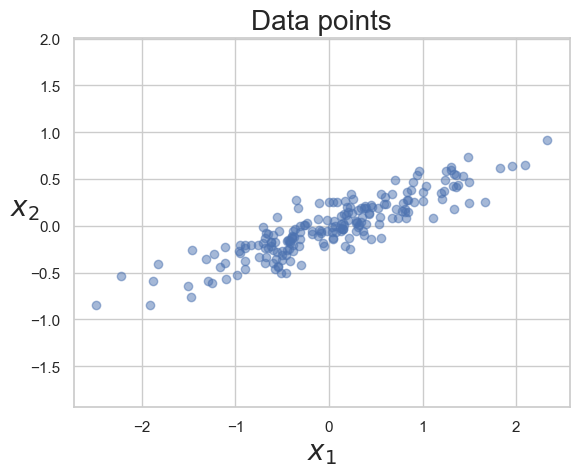

In [111]:
rand = np.random.RandomState(1)
X = np.dot(rand.rand(2, 2), rand.randn(2, 200)).T

plt.figure()
plt.title('Data points', size = 20)

# set x and y labels
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

# plot the data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal');

Let us fit a `PCA` transformer on this data and compute its two principal components: 

In [112]:
from sklearn.decomposition import PCA 

pca =PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Let's print the principle axes, they are two 2D vectors for this example. The PCA object returns them in the form of a matrix, where **each column returns them in the form of a matrix, where each column represents a principle component:** 


In [113]:
print(f'The {pca.n_components_} principle axes are \n',pca.components_)

The 2 principle axes are 
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


To understand the significance of these vectors:

The first principal axis `[-0.94446029 -0.32862557]` represents the `direction of maximum variance` in the data.
The second principal axis `[-0.32862557  0.94446029]`, being `orthogonal to the first`, represents the `direction of the second-highest variance`.

Let's also look at the explained variance corresponding to each priciple axes.

In [114]:
print('Explained variance by each component', pca.explained_variance_)

Explained variance by each component [0.7625315 0.0184779]


`explained_variance_` quantifies how much variance each principal component captures from the original data. `Higher explained variance` indicates that the corresponding principal component retains `more information` about the data's variability.

To better understand PCA, let's visualize these principle axex.
* There are two principle axes $ C_1 and C_2$. They are orthogonal to each other. An additional vector $C_3$ is also mentioned for comparision.
* The lenghts of $C_1$ and $C_2$ are taken as square root of respective explained variance. The length of the vector implies how important that vector is.

In [115]:
projections = X@pca.components_
print(projections.shape)
c3 = X[2]
arbitary_projection = X@c3
print(arbitary_projection.shape)

(200, 2)
(200,)


Text(0.5, 0, '$z$')

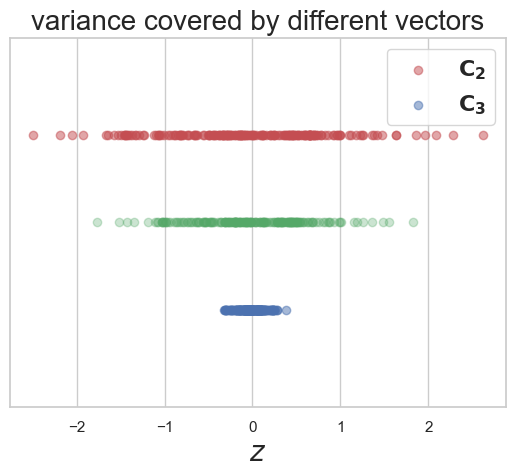

In [116]:
plt.scatter(projections[:,0], 1+np.zeros((200,1)), alpha=0.5, color='r')
plt.scatter(projections[:,1], -1+np.zeros((200,1)), alpha=0.5, color='b')
plt.scatter(arbitary_projection, np.zeros((200,)), alpha=0.3, color='g')
plt.legend(['$\mathbf{C_2}$','$\mathbf{C_3}$'],prop={'size': 16})
plt.title("variance covered by different vectors",size = 20)
plt.ylim([-1.5,1.5])
plt.axis('equal')
plt.grid(True)
plt.yticks([],[])
plt.xlabel('$z$', size =20)

In [117]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
cumulative_variance_ratio = explained_variance_ratio.cumsum()
print(cumulative_variance_ratio)

[0.97634101 0.02365899]
[0.97634101 1.        ]


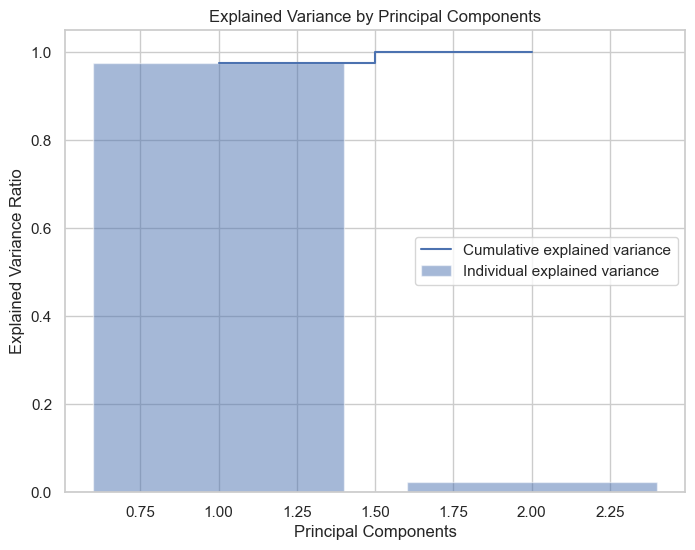

In [118]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

## Reducing Dimensions

We can use PCA to reduce number of dimensions of a dataset. The components that are least important i.e. their explained variance is low, are removed and only those components that capture high(i.e. desired) amount of variance are kept.


Let's reduce the dimension of our data from 2 to 1. You can observe the transformed data has only 1 feature.


In [127]:
pca = PCA(n_components=1)
pca.fit(X)

X_pca = pca.transform(X)
print('original shape:', X.shape)
print('transformed shape',X_pca.shape)

original shape: (200, 2)
transformed shape (200, 1)


To better understand what happened to our data, let's visualize our original data and the reduced data.
To do this, we will need to bring the transformed data into space or original data, which can be accomplished by `inverse_transform` method of `PCA` object.


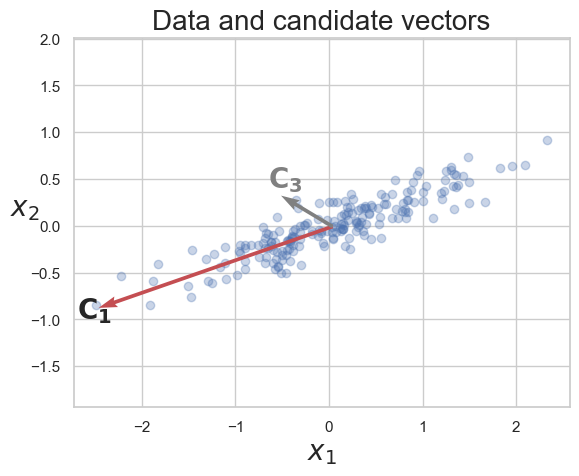

In [120]:
#@ Visualize data in PC space
#@title [Visualize principal components]

# set x and y labels

plt.figure()

plt.title('Data and candidate vectors', size = 20)

plt.xlabel('$x_1$', size=20)

plt.ylabel('$x_2$', size=20, rotation = 0)

# plot data points

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

for length, principal_axis, axis_name, i_color in zip(pca.explained_variance_, 

                                    pca.components_, 

                                    ['$\mathbf{C_1}$','$\mathbf{C_2}$'],

                                    ['r','b']):

    v = principal_axis * np.sqrt(length)

    v0, v1 = pca.mean_, pca.mean_ + v

    # draw principal axis

    plt.quiver(*v0,*(v1-v0),scale=0.33, scale_units='xy', color=i_color)

    # label the  principal axis

    plt.text(*(3.4*v1), axis_name, size = 20)

# draw 3rd component

lengths = np.eye(2)

np.fill_diagonal(lengths, np.sqrt(pca.explained_variance_))

c3 = pca.mean_+[-0.5,0.3]

plt.quiver(*pca.mean_,

           *(1.1*(c3-pca.mean_)),

           scale=1,

           scale_units='xy',

           color='grey')

# label the  principal axis

plt.text(*(1.4*c3), 

         '$\mathbf{C_3}$', 

         size = 20,

         color='grey')

plt.axis('equal')

plt.show()

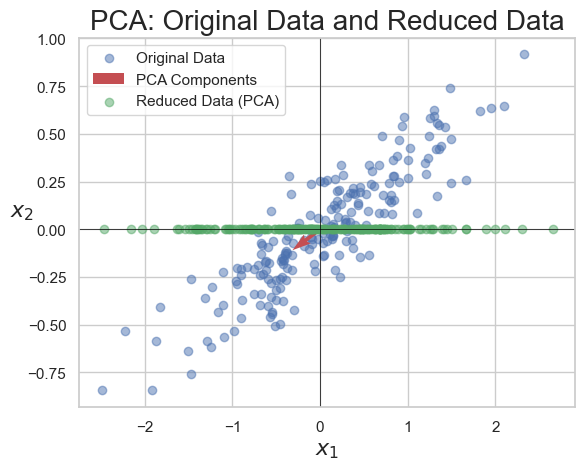

In [121]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')

# PCA Components
origin = [0], [0]  # origin point
components = pca.components_.T  # Transpose for easier plotting
plt.quiver(*origin, components[0], components[1], color=['r', 'b'], scale=3, scale_units='xy', angles='xy', label='PCA Components')

# Reduced Data after PCA
plt.scatter(X_pca, np.zeros(X_pca.shape[0]), alpha=0.5, color='g', label='Reduced Data (PCA)')

# Additional Plotting Details
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('PCA: Original Data and Reduced Data', size=20)
plt.xlabel('$x_1$', size=16)
plt.ylabel('$x_2$', size=16, rotation=0)
plt.legend()
plt.grid(True)
plt.show()

From above chart it is clear that the new/transformed data points are now projected on $\mathbf C_1$ vector. 


## **Chaining Transformers**

The preprocessing transformations are applied one after another on the input feature matrix.
>It is important to apply exactly same transformation on training, evaluation and test set in the same order.
Failing to do so would lead to incorrect predictions from model due to distribution shift and hence incorrect performance evaluation.
The `sklearn.pipeline` module provides utilities to build a composite estimator, as a chain of transformers and estimators.

### Pipeline

Sequentially apply a list of transformers and estimators.
* Intermediate steps of the pipeline must be 'transformer' that is, they must implement `fit` and `transform` methods.
* The final estimator only needs to implement `fit`. 

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

### Creating pipelines

A pipeline can be created with `Pipeline()`. It takes a list of ('estimatorsName',estimator(...)) tuples. The pipeline object exposes interface of the last step.

In [122]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
estimators =[
             ('simpleImputer',SimpleImputer()),
             ('standardScaler', StandardScaler()),
]
pipe = Pipeline(steps=estimators)

The same pipeline can also be created via `make_pipeline()` helper function, which doesn't take names of the steps and assigns them generic names based on their steps.

In [123]:
from sklearn.pipeline import make_pipeline 
pipe = make_pipeline(SimpleImputer(),StandardScaler())

In [129]:
from sklearn.decomposition import PCA

estimators= [
    ('SimpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regression', LinearRegression())
]

pipe =Pipeline(steps=estimators)

In [130]:
print(len(pipe.steps))

3


In [131]:
print(pipe.steps)

[('SimpleImputer', SimpleImputer()), ('pca', PCA()), ('regression', LinearRegression())]


The second estimator can be accessed in following 4 ways:


In [132]:
print(pipe.named_steps.pca)

PCA()


In [133]:
pipe.steps[1]

('pca', PCA())

In [134]:
pipe['pca']

PCA()

### Accessing parameters of a step in pipeline
Parameters of the estimators in the pipeline can be accessed using the __syntax, note there are two undercores 

In [135]:
estimators = [
              ('simpleImputer',SimpleImputer()),
              ('pca', PCA()),
              ('regressor',LinearRegression())
]
pipe = Pipeline(steps=estimators)
pipe.set_params(pca__n_components = 2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

### **GridSearch with pipeline**


---
By using naming convention of nested parameters, grid search can be implemented.


In [136]:
from sklearn.impute import KNNImputer 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer=['passthrough',
                           SimpleImputer(),
                           KNNImputer()],
                  clf=[SVC(),LogisticRegression()],
                  clf_C=[0.1,10,100])
grid_search = GridSearchCV(pipe, param_grid = param_grid)

* `c` is an inverse of regularization, lower its value stronger the regularization is.
* In the example above `clf_C` provides a set of values for grid search.

## Caching Transformers

Transforming data is a computationally expensive step.
* For grid search, transformers need not be applied for every parameter configuration. They can be applied only once, and the transformed data can be reused.

This can be achived by setting `memory` parameter of `pipeline` object.



In [137]:
import tempfile

tempDirPath = tempfile.TemporaryDirectory()

In [138]:
estimators = [
              ('simpleImputer', SimpleImputer()),
              ('pca', PCA(2)),
              ('regressor',LinearRegression())
]
pipe = Pipeline(steps = estimators ,memory = tempDirPath)

## FeaturerUnion 
Concatenates results of multiple transformer objects.

* Applies a list of transformer objects in parallel, and their outputs are concatenated side-by-side into a larger matrix.
`FeatuerUnion` and `Pipeline` can be used to create complex transformers.

## **Visualizaing Pipelines**


In [139]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer 
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline ([
                          ('selector', ColumnTransformer([('select_first_4',
                                                           'passthrough',
                                                           slice(0,4))])),
                           ('imputer',SimpleImputer(strategy='median')),
                           ('std_scaler', StandardScaler()),
])

cat_pipeline = ColumnTransformer([
                                  ('label_binarizer',LabelBinarizer(),[4]),
])

full_pipeline = FeatureUnion(transformer_list=
                             [('num_pipeline', num_pipeline),
                              ('cat_pipeline',cat_pipeline)
])

In [140]:
# from sklearn import set_config 
# set_config(display='diagram')

# #displays HTML representation in a jupyter context 
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

# **14. Handling Imbalanced Data** 


Imbalanced datasets are those where one class is very less represented than the other class. This kind of data results in less efficient ML algorithm.

There are two main approaches to handle imbalanced data:
* Undersampling
* Oversampling

[Image Source](https://miro.medium.com/max/1400/0*mOgypphrofDS9Z32.png)

![Image Source](https://miro.medium.com/max/1400/0*mOgypphrofDS9Z32.png)



We will demonstrate how to handle imbalance with the help of wine quality dataset that we have used earlier in this notebook.

We will reload this dataset once more before using it for the demonstration.


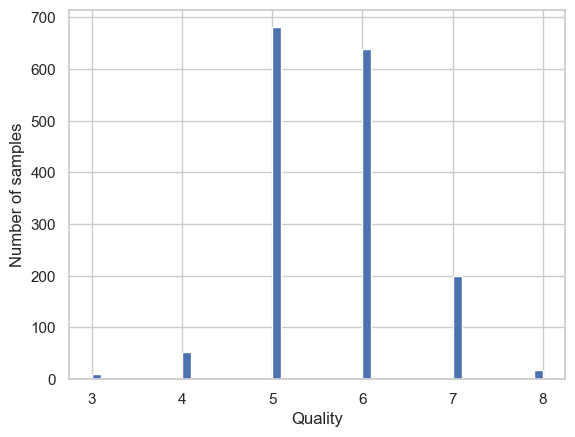

In [141]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')

#display the histograms of the target variable 'quality'

wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.show()

In [142]:
wine_data.shape

(1599, 12)

## Undersampling

Undersampling refers to sampling from the majority class in order to keep only a part of these data points.

It may be carried out using **RandomUnderSampler** class from **imblearn** library 


In [143]:
from imblearn.under_sampling import RandomUnderSampler 

class 3: (10, 12)
class 4: (53, 12)
class 5: (681, 12)
class 6: (638, 12)
class 7: (199, 12)
class 8: (18, 12)


<Axes: ylabel='Frequency'>

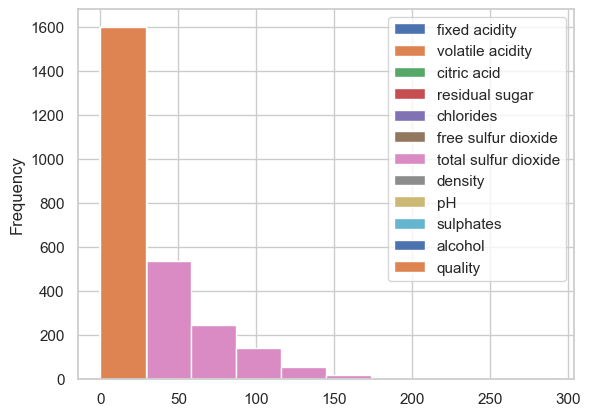

In [144]:
#class
class_count_3,class_count_4,class_count_5,class_count_6,class_count_7,class_count_8 = wine_data['quality'].value_counts()

#separate class
class_3= wine_data[wine_data['quality']==3]
class_4= wine_data[wine_data['quality']==4]
class_5= wine_data[wine_data['quality']==5]
class_3= wine_data[wine_data['quality']==3]
class_6= wine_data[wine_data['quality']==6]
class_7= wine_data[wine_data['quality']==7]
class_8= wine_data[wine_data['quality']==8]


# print the shape of the class
print("class 3:", class_3.shape)
print("class 4:", class_4.shape)
print("class 5:", class_5.shape)
print("class 6:", class_6.shape)
print("class 7:", class_7.shape)
print("class 8:", class_8.shape)


#for i in range(3,9):
 # print(f'print("class {i}:", class_{i}.shape)')
wine_data.plot.hist()


In [145]:
from collections import Counter #It allows you to count the items in an iterable list.

X = wine_data.drop(['quality'],axis=1)
y = wine_data['quality']

undersample = RandomUnderSampler(random_state =0)
X_rus, y_rus = undersample.fit_resample(X,y) # $\textbf fit_resample$
print('original dataset shape:', Counter(y))
print('Resample dataset shape',Counter(y_rus))

original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


The class with the least number of samples is'3'. Hence all the other class samples are reduced to the number of samples in the least class.


## Oversampling

Oversampling refers to replicating some points from the minority class in order to increase the cardinality of the minority class. This might consist of either replicating or generating synthetic data for the minority class.

It may be carried out using RandomOverSampler class from imblearn library.



In [146]:
from imblearn.over_sampling import RandomOverSampler 

ros = RandomOverSampler() 
X_ros, y_ros = ros.fit_resample(X,y)
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))

original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [147]:
print(X_ros.shape[0]-X.shape[0],'New random points generated with RandomOverSampler')

2487 New random points generated with RandomOverSampler


The class with the majority number of samples is '5'. Hence all the other class samples that are lesser than this class count are newly sampled to the number of samples in the majority class.



### **Oversampling using SMOTE**

SMOTE (Synthetic Minority Oversampling Technique) is a popular technique for over sampling. It is available under **imblean** library.


In [148]:
from imblearn.over_sampling import SMOTE 

oversample = SMOTE() 
X_sm, y_sm = oversample.fit_resample(X,y)
counter = Counter(y_sm)
counter

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [149]:
print(X_sm.shape[0]-X.shape[0],'New random generated with SMOTE')

2487 New random generated with SMOTE


**Types of SMOTE** 
* Borderline SMOTE
* Borderline-SMOTE SVM
* Adaptive Synthetic Sampling(ADASYN)